In [6]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape

import matplotlib.pyplot as plt
import numpy as np

(X_train, _), (X_test, _) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255

In [2]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [9]:
# 생성자 모델 생성
autoencoder = Sequential()

# 인코딩 부분 (차원 축소(MaxPooling))
autoencoder.add(Conv2D(16, kernel_size=3, padding='same', input_shape=(28, 28,1),
                      activation='relu'))
autoencoder.add(MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(Conv2D(8, kernel_size=3, activation='relu', padding='same'))
autoencoder.add(MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(Conv2D(8, kernel_size=3, strides=2, padding='same',
                      activation='relu'))

# 디코딩 부분 (차원을 점차 늘려 입력 값과 똑같은 크기의 출력 값을 내보냄(UpSampling))
autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(16, kernel_size=3, activation='relu')) # padding이 없음
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(1, kernel_size=3, padding='same', activation='sigmoid'))

In [10]:
# 전체 구조 확인 (마지막 층의 벡터 값이 28 * 28 임을 확인)
autoencoder.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 4, 4, 8)           584       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 4, 4, 8)           584       
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 8, 8, 8)          

Epoch 1/50
469/469 [==============================] - 46s 98ms/step - loss: 0.2085 - val_loss: 0.1361
Epoch 2/50
469/469 [==============================] - 42s 89ms/step - loss: 0.1271 - val_loss: 0.1184
Epoch 3/50
469/469 [==============================] - 41s 87ms/step - loss: 0.1150 - val_loss: 0.1099
Epoch 4/50
469/469 [==============================] - 42s 89ms/step - loss: 0.1083 - val_loss: 0.1048
Epoch 5/50
469/469 [==============================] - 42s 89ms/step - loss: 0.1041 - val_loss: 0.1012
Epoch 6/50
469/469 [==============================] - 45s 97ms/step - loss: 0.1009 - val_loss: 0.0982
Epoch 7/50
469/469 [==============================] - 42s 90ms/step - loss: 0.0985 - val_loss: 0.0962
Epoch 8/50
469/469 [==============================] - 42s 90ms/step - loss: 0.0966 - val_loss: 0.0947
Epoch 9/50
469/469 [==============================] - 42s 90ms/step - loss: 0.0951 - val_loss: 0.0931
Epoch 10/50
469/469 [==============================] - 43s 91ms/step - loss: 0.093

ValueError: Illegal argument(s) to subplot: (2, 7, 7, 1)

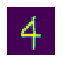

In [14]:
# 컴파일 및 학습 부분
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(X_train, X_train, epochs=50, batch_size=128,\
               validation_data=(X_test, X_test))

# 학습된 결과 출력 부분
random_test = np.random.randint(X_test.shape[0], size=5)
ae_imgs = autoencoder.predict(X_test) # 앞서 만든 오토인코더 모델에 집어 넣음
plt.figure(figsize=(7, 2)) # 출력될 이미지의 크기를 정함

for i, image_idx in enumerate(random_test): # 랜덤하게 뽑은 이미지를 차례로 나열
    ax = plt.subplot(2, 7, i + 1)
    plt.imshow(X_test[image_idx].reshape(28, 28)) # 테스트할 이미지를 먼저 그대로 보여줌
    ax.axis('off')
    ax = plt.subplot(2, 7, 7 + i + 1)
    plt.imshow(ae_imgs[image_idx].reshape(28, 28)) # 오토인코딩 결과를 다음 열에 출력
    ax.axis('off')
plt.show()